# Análise de crimes no brasil - Projeto Descontinuado

### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def clean_string(x):
    string = x.split('.-')[-1]
    string = string.split('(')[0]
    return string.strip()

### Lendo o dataset

In [3]:
listOfDfs = []
# Iterar sobre os itens e verificar se são arquivos
for item in os.listdir('./datasets/crimes'):
    caminho_completo = os.path.join('./datasets/crimes', item)
    if os.path.isfile(caminho_completo):
        df = pd.read_csv(caminho_completo, low_memory=False)
        listOfDfs.append(df)

In [4]:
df_principal = pd.concat(listOfDfs)
df_principal = df_principal.dropna(axis=1, how='all')
df_principal.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,5695,2015,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,2015,...,TRANSEUNTE,-23.540788,-46.629665,S.PAULO,RUA DA CANTAREIRA,400,C,NaN,NaN,NaN
1,12365,2015,10211,DECAP,DEL.SEC.6º SANTO AMARO,11º D.P. SANTO AMARO,DECAP,DEL.SEC.6º SANTO AMARO,99º D.P. CAMPO GRANDE,2015,...,VEICULO,-23.674905,-46.679477,S.PAULO,RUA JOAO CARLOS DE ARTUR,294,C,NaN,NaN,NaN
2,6115,2015,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,DECAP,DEL.SEC.2º SUL,17º D.P. DOUTOR ALDO GALIANO,2015,...,TRANSEUNTE,-23.587069,-46.607384,S.PAULO,RUA BOM PASTOR,1200,C,NaN,NaN,NaN
3,1823,2015,10308,DECAP,DEL.SEC.5º LESTE,52º D.P. PARQUE S.JORGE,DECAP,DEL.SEC.5º LESTE,52º D.P. PARQUE S.JORGE,2015,...,NaN,-23.534230,-46.567711,S.PAULO,RUA JOSE TAVARES DE SIQUEIRA,0,C,NaN,NaN,NaN
4,370,2015,10309,DECAP,DEL.SEC.8º SAO MATEUS,55º D.P. PARQUE S.RAFAEL,DECAP,DEL.SEC.8º SAO MATEUS,55º D.P. PARQUE S.RAFAEL,2015,...,ESTABELECIMENTO COMERCIAL,NaN,NaN,S.PAULO,AVENIDA SAPOPEMBA,20020,C,NaN,NaN,NaN


### Validando colunas nulas e excluindo as colunas com dados nulos

In [5]:
null_counts = df_principal.isnull().sum()
total_rows = len(df_principal) 
percentual_null = (null_counts / total_rows) * 100

df_null_info = pd.DataFrame({ 'Coluna': null_counts.index, 'Valores nulos': null_counts.values, 'Percentual': percentual_null.values })
colunm_null = df_null_info.loc[df_null_info['Percentual'] > 0]['Coluna'].tolist()

df_principal.drop(columns=colunm_null, inplace=True)

df_null_info


,Coluna,Valores nulos,Percentual
0,NUM_BO,0,0.000000
1,ANO_BO,0,0.000000
2,ID_DELEGACIA,0,0.000000
3,NOME_DEPARTAMENTO,0,0.000000
4,NOME_SECCIONAL,0,0.000000
5,DELEGACIA,0,0.000000
6,NOME_DEPARTAMENTO_CIRC,0,0.000000
7,NOME_SECCIONAL_CIRC,0,0.000000
8,NOME_DELEGACIA_CIRC,0,0.000000
9,ANO,0,0.000000


In [6]:
df_principal.describe()

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES
count,1.555644e+06,1.555644e+06,1.555644e+06,1.555644e+06,1.555644e+06
mean,2.901578e+05,2.015510e+03,3.274757e+05,2.015498e+03,6.523762e+00
std,4.789176e+05,5.096795e-01,4.162808e+05,4.999960e-01,3.447710e+00
min,1.000000e+00,2.015000e+03,1.000400e+04,2.015000e+03,1.000000e+00
25%,2.017000e+03,2.015000e+03,1.036600e+04,2.015000e+03,4.000000e+00
50%,5.429000e+03,2.016000e+03,3.021500e+04,2.015000e+03,7.000000e+00
75%,4.763258e+05,2.016000e+03,9.000200e+05,2.016000e+03,1.000000e+01
max,1.673679e+06,2.017000e+03,9.909000e+05,2.016000e+03,1.200000e+01


In [7]:
df_principal.dtypes

NUM_BO                     int64
ANO_BO                     int64
ID_DELEGACIA               int64
NOME_DEPARTAMENTO         object
NOME_SECCIONAL            object
DELEGACIA                 object
NOME_DEPARTAMENTO_CIRC    object
NOME_SECCIONAL_CIRC       object
NOME_DELEGACIA_CIRC       object
ANO                        int64
MES                        int64
FLAG_STATUS               object
RUBRICA                   object
CIDADE                    object
FLAG_STATUS.1             object
dtype: object

In [ ]:
# Criando colunas adicionais

meses_dict = { '01': 'Janeiro', '02': 'Fevereiro', '03': 'Março', '04': 'Abril', '05': 'Maio', '06': 'Junho', '07': 'Julho', '08': 'Agosto', '09': 'Setembro', '10': 'Outubro', '11': 'Novembro', '12': 'Dezembro' }

df_principal['MES'] = df_principal['MES'].apply(lambda x: f'{x:02}')
df_principal['NOME_MES'] = df_principal['MES'].map(meses_dict)
df_principal['ANO_MES'] = df_principal['ANO'].astype(str) + '-' + df_principal['MES'].astype(str)
df_principal = df_principal.apply(lambda x: x.strip() if isinstance(x, str) else x)
df_principal['RUBRICA'] = df_principal['RUBRICA'].apply(clean_string)
# df_principal['transaction_year'] = df_principal['transaction_date'].dt.year

### Análise dos meus dados

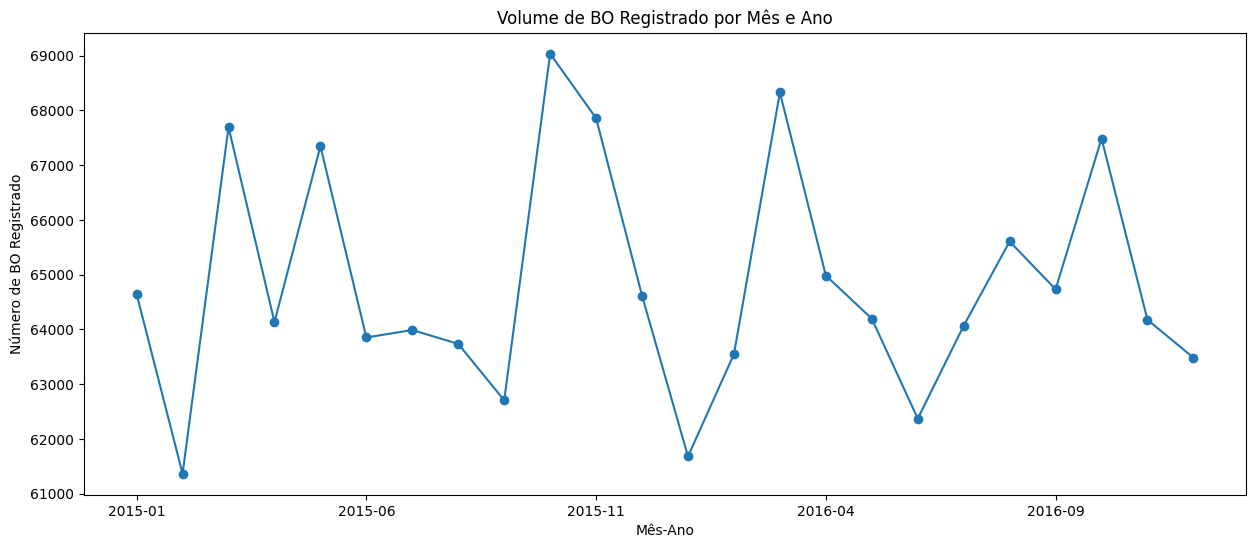

In [ ]:
# Número de transações por Mês
plt.figure(figsize=(15, 6))
nm_crimes_for_month = df_principal.groupby('ANO_MES').size()
nm_crimes_for_month.plot(kind='line', marker='o')

plt.title("Volume de BO Registrado por Mês e Ano")
plt.xlabel("Mês-Ano")
plt.ylabel("Número de BO Registrado")
plt.show()

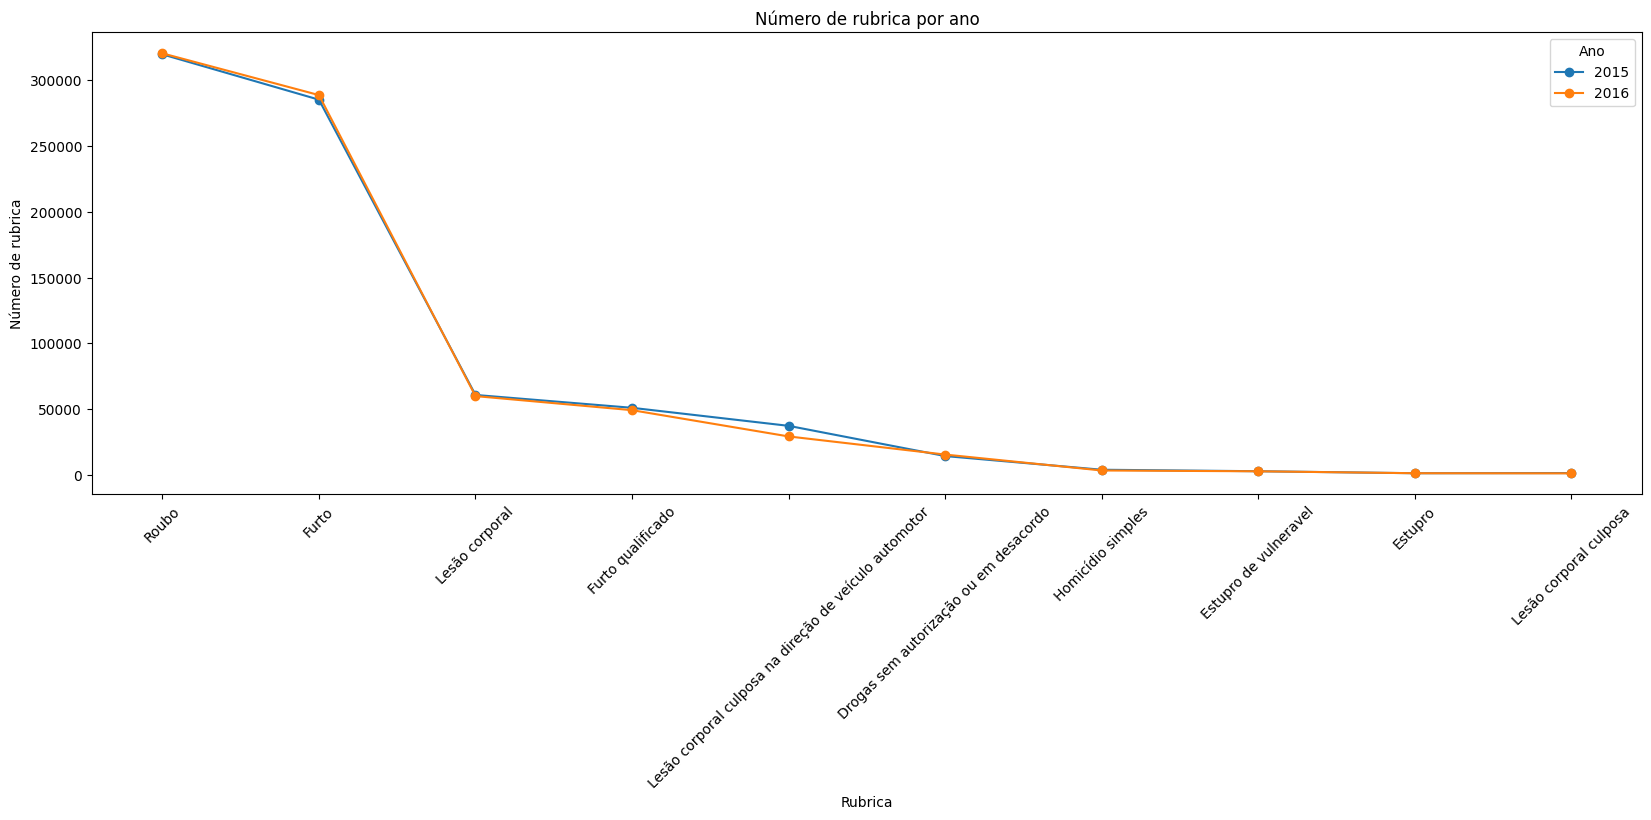

In [ ]:
# Top 10 Rubricas com maiores volumes
plt.figure(figsize=(20, 6))

nm_rubrica_for_month = df_principal.groupby(['RUBRICA','ANO']).size().unstack(fill_value=0)
nm_rubrica_for_month = nm_rubrica_for_month.sort_values(by=nm_rubrica_for_month.columns[-1], ascending=False).head(10)

nm_rubrica_for_month.index = nm_rubrica_for_month.index.astype(str)
plt.plot(nm_rubrica_for_month, marker='o')
plt.title("Número de rubrica por ano")
plt.xlabel("Rubrica")
plt.ylabel("Número de rubrica")
plt.legend(nm_rubrica_for_month.columns, title='Ano')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x600 with 0 Axes>

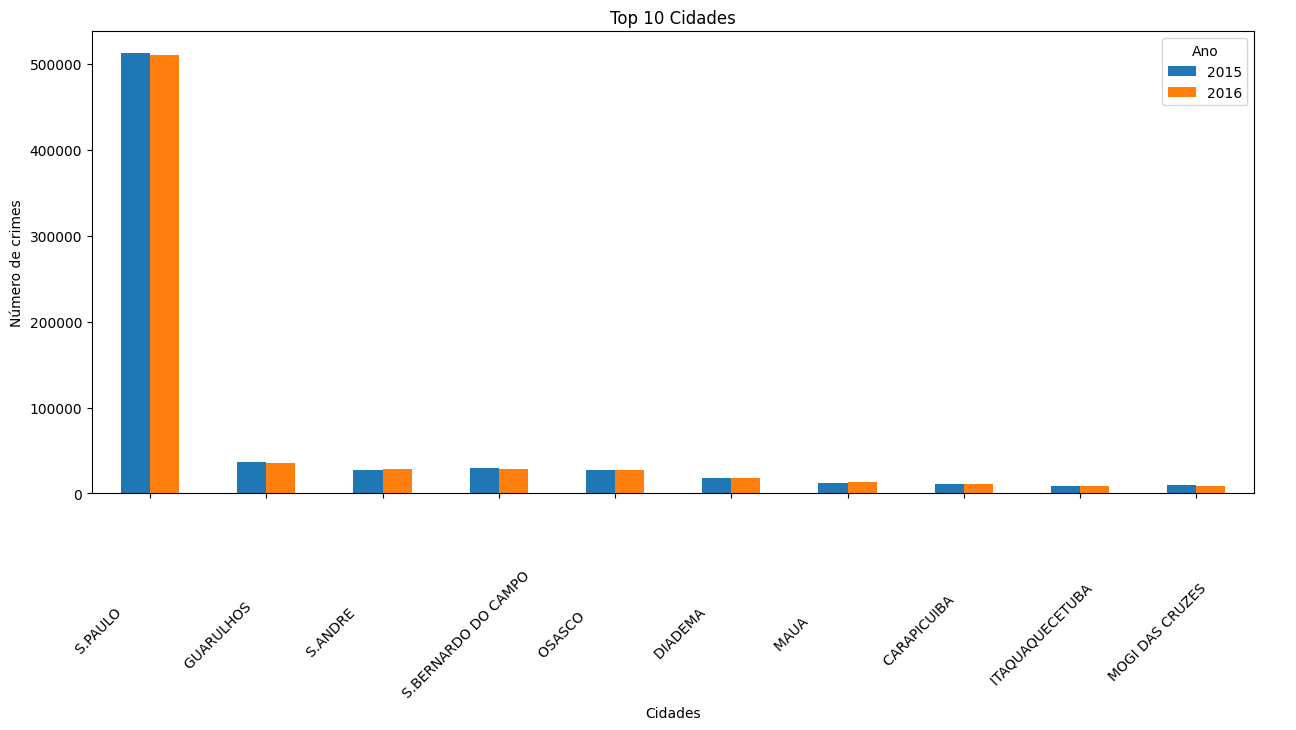

In [ ]:
# Top 10 Cidade com volume de crimes
plt.figure(figsize=(15, 6))
nm_crime_for_city = df_principal.groupby(['CIDADE', 'ANO']).size().unstack(fill_value=0)
nm_crime_for_city = nm_crime_for_city.sort_values(by=nm_crime_for_city.columns[-1], ascending=False).head(10)

nm_crime_for_city.plot(kind='bar', stacked=False, figsize=(15, 6))
plt.title("Top 10 Cidades")
plt.xlabel("Cidades")
plt.ylabel("Número de crimes")
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.show()

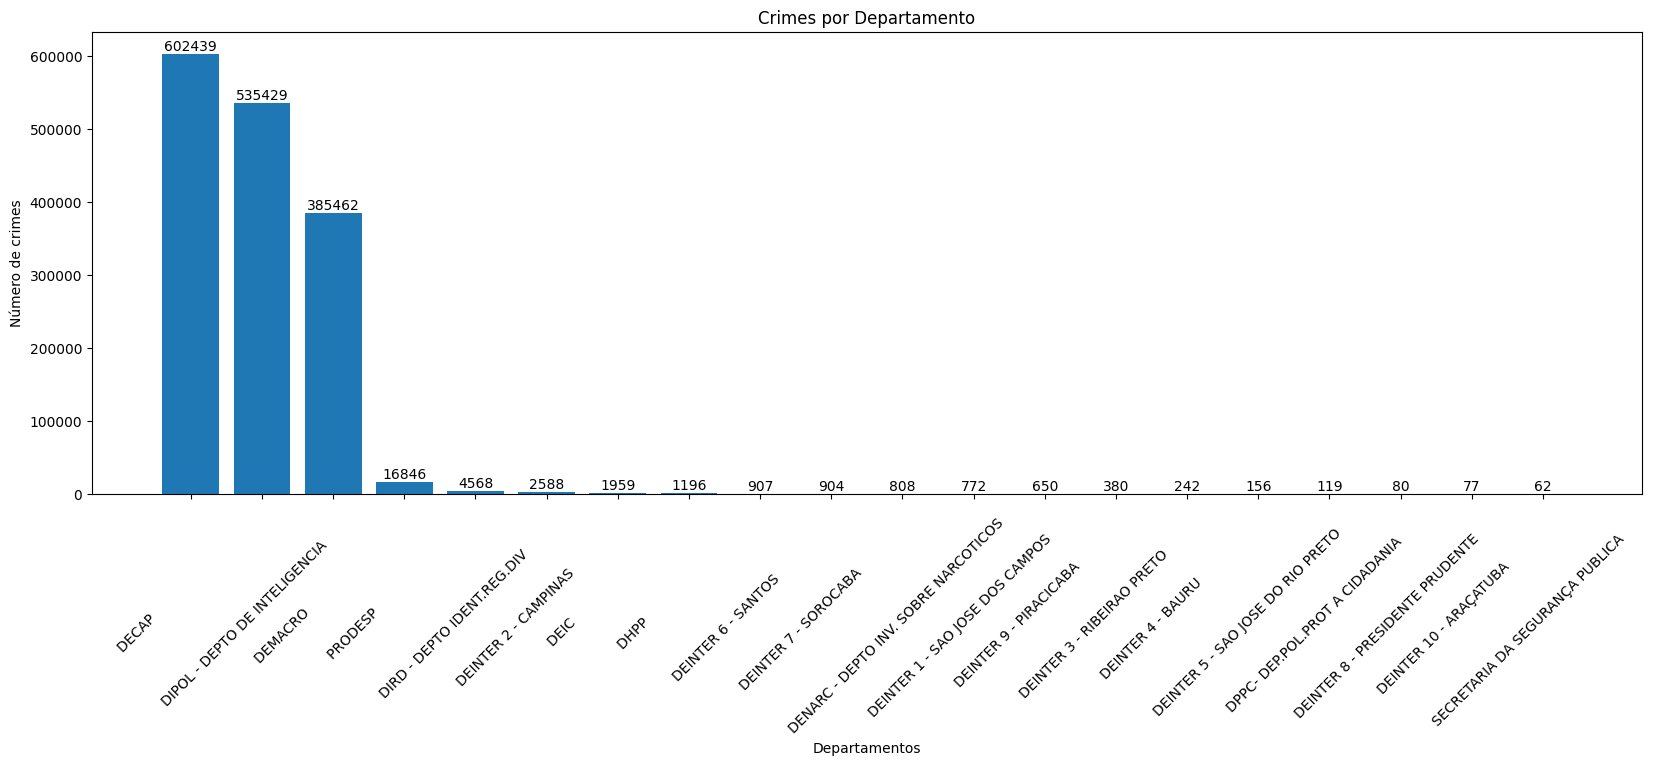

In [ ]:
# Transações por Cidade
plt.figure(figsize=(20, 6))
nm_crime_for_departament = df_principal.groupby('NOME_DEPARTAMENTO').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False)

bars = plt.bar(nm_crime_for_departament['NOME_DEPARTAMENTO'], nm_crime_for_departament['COUNT'])
plt.title("Crimes por Departamento")
plt.xlabel("Departamentos")
plt.ylabel("Número de crimes")
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')
plt.show()

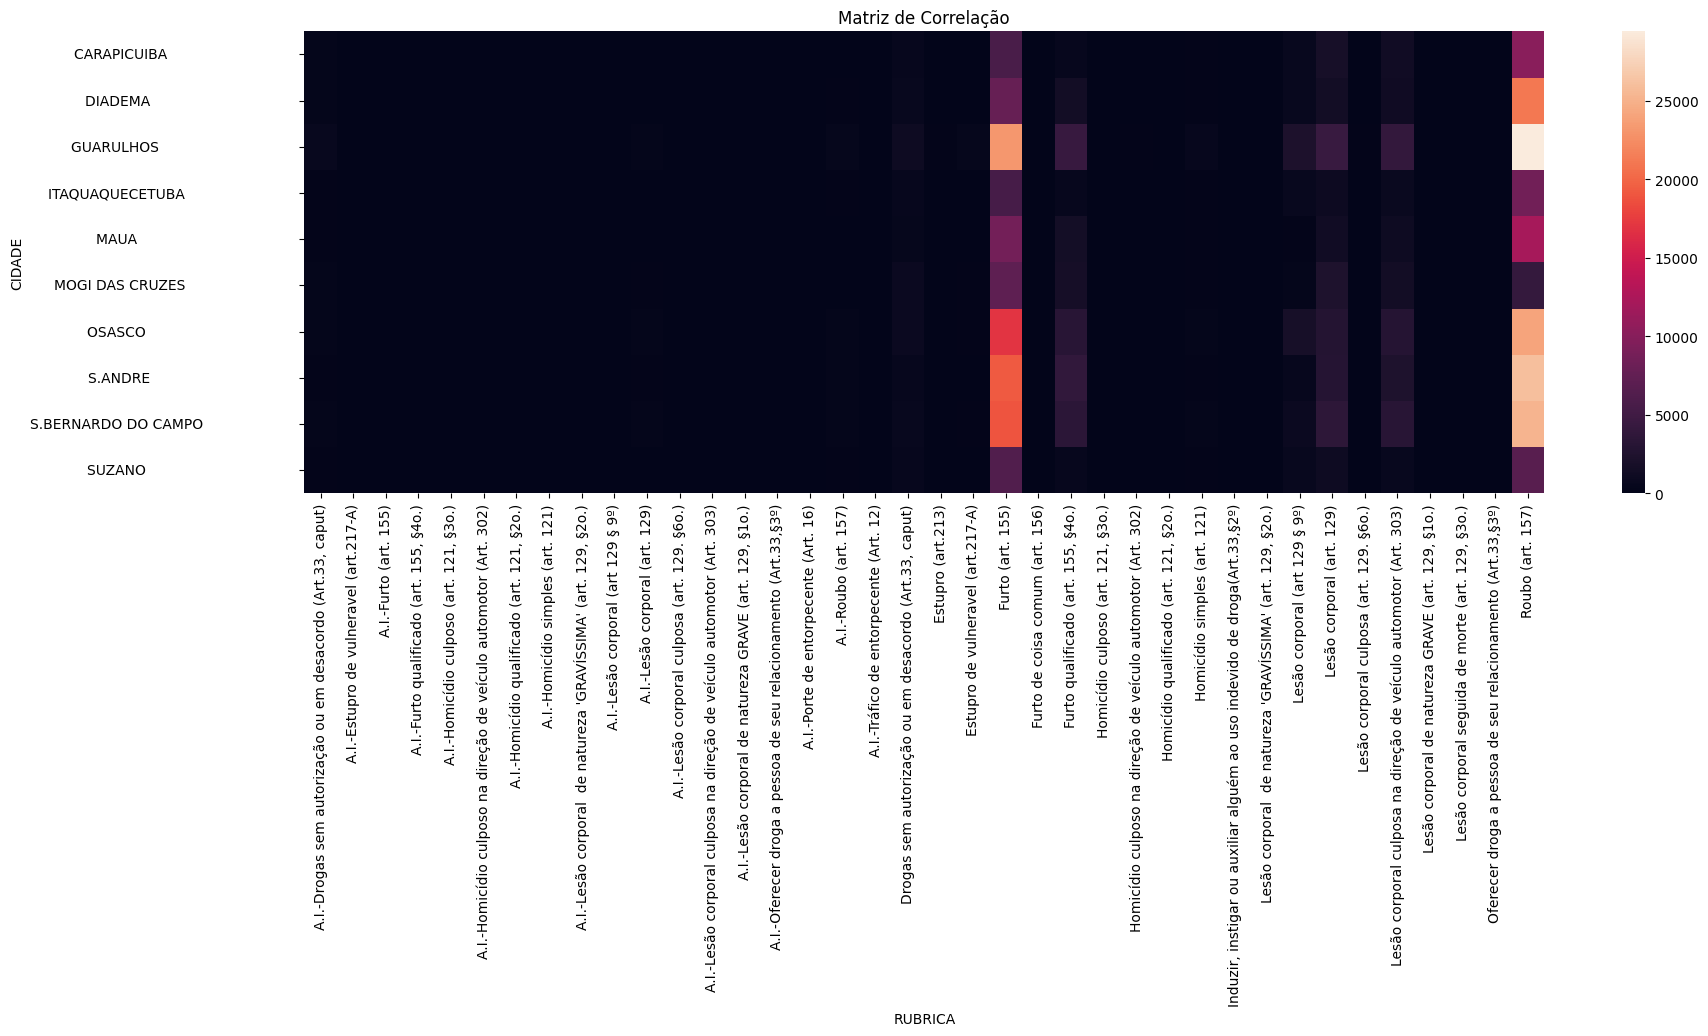

In [11]:
# # Criar o gráfico de correlação
df_correlation = df_principal[['RUBRICA', 'CIDADE']]

df_citys = df_correlation.groupby('CIDADE').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False).head(11).tail(10)
top_10_citys = df_citys['CIDADE'].tolist()

df_correlation = df_correlation[df_correlation['CIDADE'].isin(top_10_citys)]

df_correlations = df_correlation.groupby(['CIDADE']).value_counts().unstack().fillna(0)

plt.figure(figsize=(20, 6))  # Tamanho da figura
sns.heatmap(df_correlations)

# Adicionar título
plt.title("Matriz de Correlação")
plt.show()

### Classificação dos meu dados

In [ ]:
df_classification = df_principal.copy()

# Agrupar por ANO-MES, RUBRICA e DELEGACIA
grouped = df_classification.groupby(['ANO','RUBRICA','DELEGACIA']).size().reset_index(name='TOTAL_OCORRENCIAS')

# Encontrar a delegacia com mais ocorrências por ANO-MES e RUBRICA
top_delegacia = grouped.loc[grouped.groupby(['ANO','RUBRICA'])['TOTAL_OCORRENCIAS'].idxmax()]

# Preparar features e target
X = top_delegacia[['ANO','RUBRICA']]
y = top_delegacia['DELEGACIA']

# Codificar variáveis categóricas
le_rubrica = LabelEncoder()
X.loc[:, 'RUBRICA'] = le_rubrica.fit_transform(X['RUBRICA'])

le_delegacia = LabelEncoder()
y = le_delegacia.fit_transform(y)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Relatório de classificação:")
print(classification_report(
    y_test, 
    y_pred, 
    labels=list(range(len(le_delegacia.classes_))),
    target_names=le_delegacia.classes_,
    zero_division=0
))
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

Relatório de classificação:
                                precision    recall  f1-score   support

01ª DEL.DEF.MUL. CENTRO              0.00      0.00      0.00         0
01º D.P. MAUA                        0.00      0.00      0.00         1
01º D.P. MOGI DAS CRUZES             0.00      0.00      0.00         0
01º D.P. OSASCO                      0.00      0.00      0.00         0
02º D.P. BOM RETIRO                  0.00      0.00      0.00         1
02º D.P. MOGI DAS CRUZES             0.00      0.00      0.00         0
02º D.P. OSASCO                      0.00      0.00      0.00         1
03º D.P. SANTO ANDRÉ                 0.00      0.00      0.00         1
04º D.P. SANTO ANDRÉ                 0.00      0.00      0.00         1
06ª DEL.DEF.MUL. STO AMARO           0.00      0.00      0.00         0
07º D.P. GUARULHOS                   0.00      0.00      0.00         0
08º D.P. BRAS                        0.00      0.00      0.00         0
11º D.P. SANTO AMARO               

In [ ]:
top_delegacia

,ANO,RUBRICA,DELEGACIA,TOTAL_OCORRENCIAS
124,2015,Drogas sem autorização ou em desacordo,47º D.P. CAPAO REDONDO,319
239,2015,Estupro,01ª DEL.DEF.MUL. CENTRO,38
442,2015,Estupro de vulneravel,01ª DEL.DEF.MUL. CENTRO,145
1293,2015,Furto,DELEGACIA ELETRONICA,146250
1339,2015,Furto de coisa comum,02º D.P. OSASCO,6
1595,2015,Furto qualificado,78º D.P. JARDINS,1142
1852,2015,Homicídio culposo,DEL.POL.FRANCO ROCHA,5
1880,2015,Homicídio culposo na direção de veículo automotor,02º D.P. MOGI DAS CRUZES,25
2081,2015,Homicídio qualificado,49º D.P. SAO MATEUS,35
2350,2015,Homicídio simples,DHPP DIV. HOMICIDIOS,319
